## Data Exploration 2
In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read in us education data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
student_performance_df.columns = student_performance_df.columns.str.replace(' ', '_')
student_performance_df.columns = map(str.lower, student_performance_df.columns)

In [4]:
student_performance_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 4. Which 2 exam scores are most correlated with each other?

In [5]:
student_performance_df.iloc[:,-3:]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [6]:
student_performance_df.iloc[:,-3:].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


(3.0, 0.0)

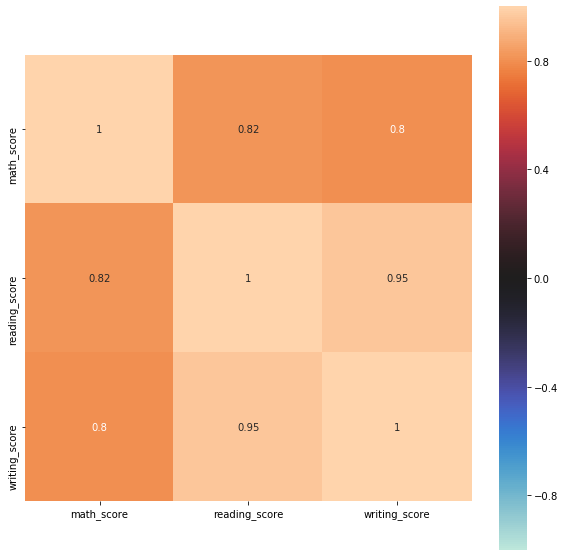

In [8]:
plt.figure(figsize=(10, 10))

ax = sns.heatmap(student_performance_df.iloc[:,-3:].corr(), vmin=-1, vmax=1, center=0, square=True, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Writing and reading scores seem to be the scores most highly correlated with each other.  This makes a lot of sense since there is much more commonality between writing and reading than there is between either writing and math and reading and math.